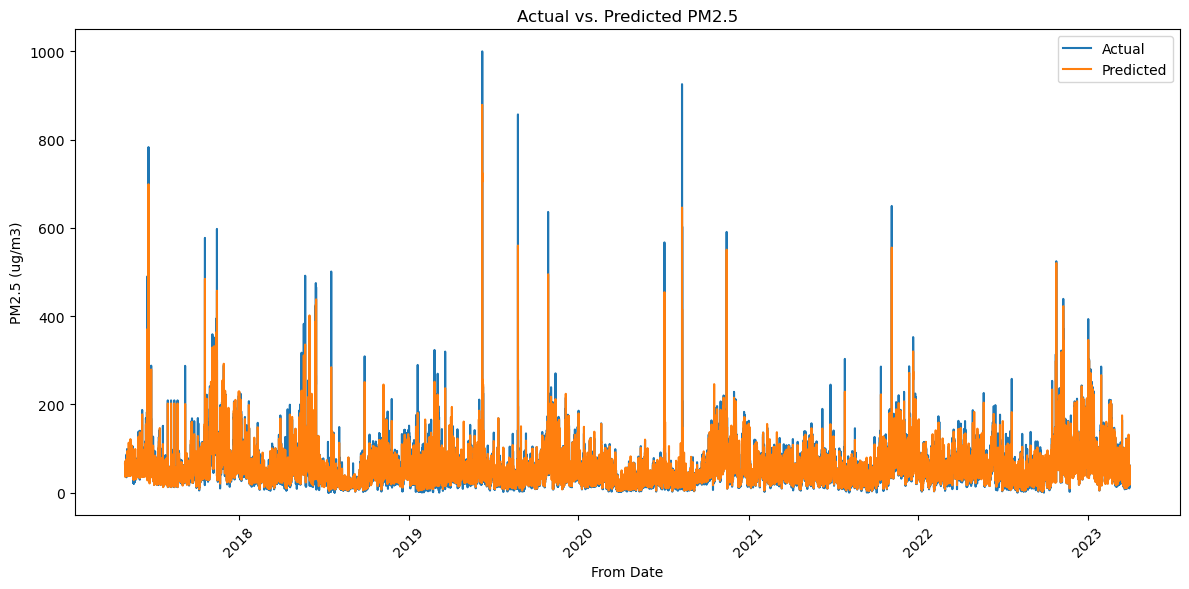

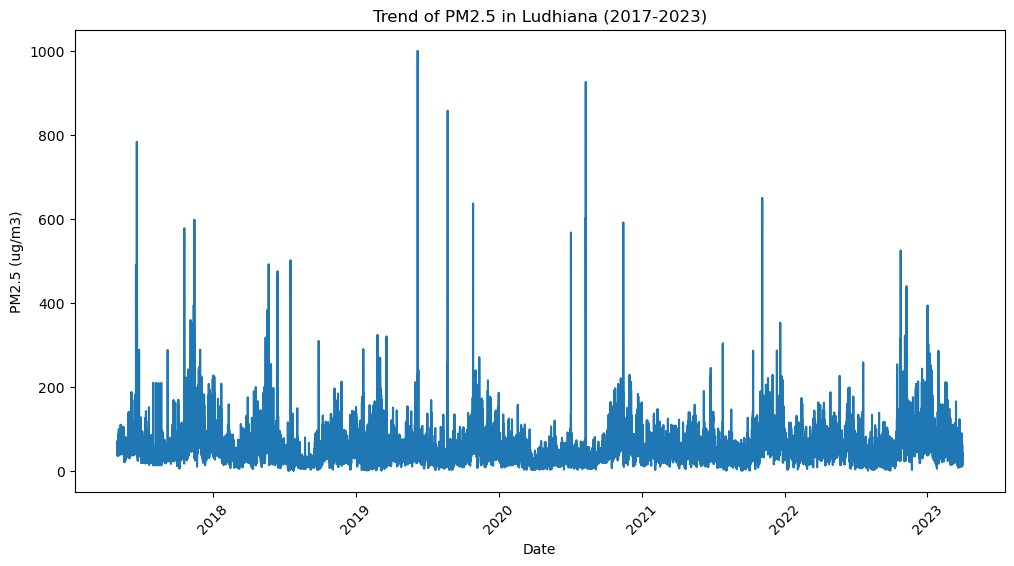

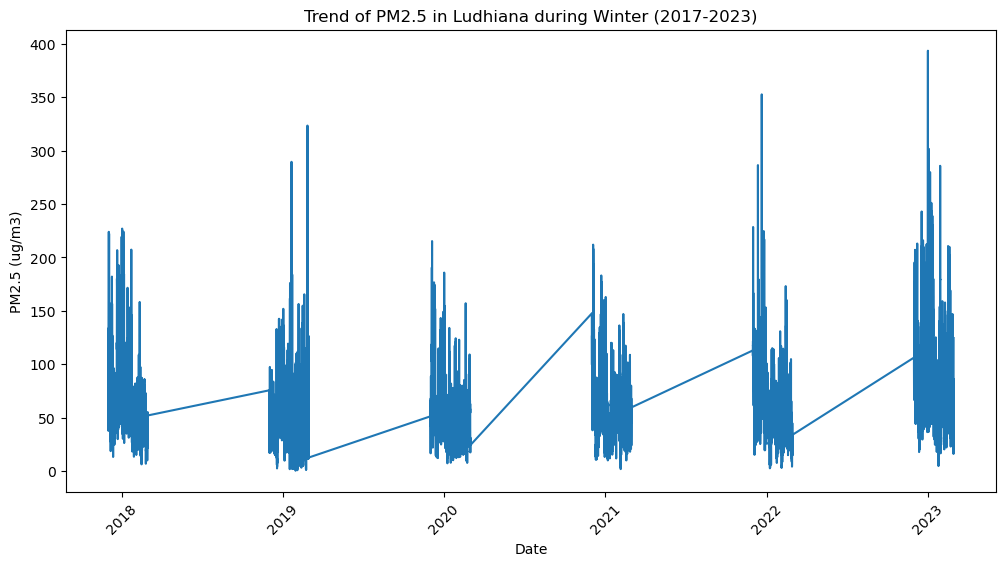

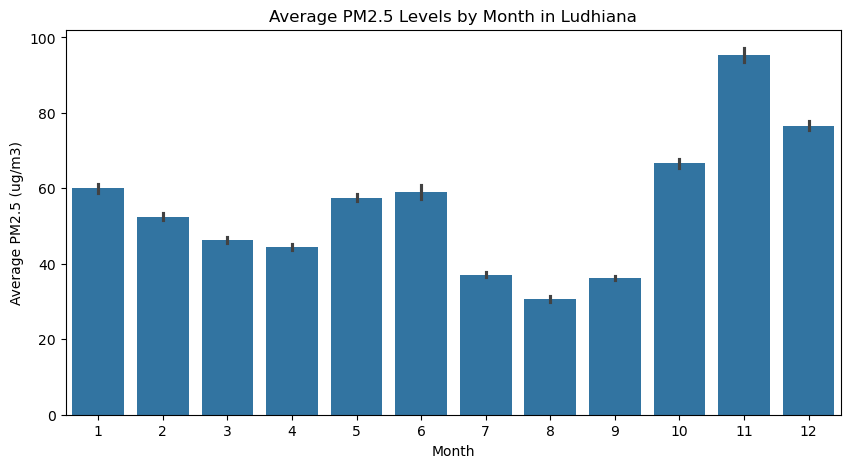


Feature Importance:
            Feature  Importance
0      PM10 (ug/m3)    0.633167
2       NO2 (ug/m3)    0.052061
8   Benzene (ug/m3)    0.044883
5       SO2 (ug/m3)    0.026001
17            Month    0.025802
6        CO (mg/m3)    0.025082
4       NH3 (ug/m3)    0.023179
14       SR (W/mt2)    0.021189
11           RH (%)    0.018714
10  Temp (degree C)    0.016429
3         NOx (ppb)    0.016377
9   Toluene (ug/m3)    0.016302
7     Ozone (ug/m3)    0.015978
12         WS (m/s)    0.014552
15             Hour    0.013481
1        NO (ug/m3)    0.012752
13         WD (deg)    0.012347
16        DayOfWeek    0.011703


In [5]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load and Preprocess Data (Only needs to be done once and then you can load the saved preprocessed data)
# try:
#     df = pd.read_csv("PB003.csv")  # Load your dataset
# except FileNotFoundError:
#     print("Error: PB003.csv not found. Please check the file path.")
#     exit()


# df['From Date'] = pd.to_datetime(df['From Date'], format="%d-%m-%Y %H:%M")
# df['To Date'] = pd.to_datetime(df['To Date'], format="%d-%m-%Y %H:%M")

# df['Hour'] = df['From Date'].dt.hour
# df['DayOfWeek'] = df['From Date'].dt.dayofweek
# df['Month'] = df['From Date'].dt.month

# df_knn = df.drop(['From Date', 'To Date'], axis=1)  # Drop date columns for imputation


# # Use this block to load preprocessed data if already saved
# try:
#     df_imputed = pd.read_csv("PB003_preprocessed.csv")
#     target_column = 'PM2.5 (ug/m3)'
#     features = [col for col in df_imputed.columns if col not in [target_column, 'From Date', 'To Date']]
#     X = df_imputed[features]

# except FileNotFoundError: # If not, preprocess and save it
#     imputer = KNNImputer(n_neighbors=5)
#     df_imputed_knn = pd.DataFrame(imputer.fit_transform(df_knn), columns=df_knn.columns)


#     df_imputed = df_imputed_knn.copy()
#     df_imputed['From Date'] = df['From Date']
#     df_imputed['To Date'] = df['To Date']


#     # Save preprocessed data (so you don't need to impute every time)
#     df_imputed.to_csv("PB003_preprocessed.csv", index=False)

#     target_column = 'PM2.5 (ug/m3)'  # Define your target variable
#     features = [col for col in df_imputed.columns if col not in [target_column, 'From Date', 'To Date']]

#     X = df_imputed[features] # Features for model training
#     y = df_imputed[target_column]


#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#     model = RandomForestRegressor(n_estimators=100, random_state=42)
#     model.fit(X_train, y_train)
#     joblib.dump(model, "trained_model.joblib")  # Save trained model


# 2. Load the Saved Model
model = joblib.load("trained_model.joblib") # Load the model for prediction


# 3. Make Predictions (if needed)
df_imputed['Predictions'] = model.predict(X)  #(Only X, the features!)



# 4. Visualizations
# ... (Your visualization code from previous responses)
#      Actual Vs predicted
plt.figure(figsize=(12, 6))
sns.lineplot(x='From Date', y=target_column, data=df_imputed, label='Actual') # df_imputed has datetimes
sns.lineplot(x='From Date', y='Predictions', data=df_imputed, label='Predicted')  
plt.title('Actual vs. Predicted PM2.5')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 1. Trend of AQI 2017-2023
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.lineplot(x='From Date', y='PM2.5 (ug/m3)', data=df_imputed)
plt.title('Trend of PM2.5 in Ludhiana (2017-2023)')
plt.xlabel('Date')
plt.ylabel('PM2.5 (ug/m3)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()



# 2. Trend of AQI in Winter Seasons
winter_months = [12, 1, 2]  # December, January, February
df_winter = df_imputed[df_imputed['From Date'].dt.month.isin(winter_months)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='From Date', y='PM2.5 (ug/m3)', data=df_winter)
plt.title('Trend of PM2.5 in Ludhiana during Winter (2017-2023)')
plt.xlabel('Date')
plt.ylabel('PM2.5 (ug/m3)')
plt.xticks(rotation=45)
plt.show()







# 4. Most Polluted Months of the Year
plt.figure(figsize=(10, 5))
sns.barplot(x=df_imputed['From Date'].dt.month, y='PM2.5 (ug/m3)', data=df_imputed, estimator='mean')  # Use estimator='mean' for average PM2.5
plt.title('Average PM2.5 Levels by Month in Ludhiana')
plt.xlabel('Month')
plt.ylabel('Average PM2.5 (ug/m3)')
plt.show()

# ... (Add other visualizations here) ...

#Feature Importance

feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
print("\nFeature Importance:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))